# 1. Import Data Libaries

In [2]:
# Standard Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

#2. Data Preparation
## 2.1 Review Dataset
This step involves developing an understanding of the dataset. Store the data in a variable, formatting it into a dataframe using the Pandas library. This dataset is missing some invoice amounts, and has a column with categorical values.

In [3]:
# Create a variable "payments" to store the dataset in dataframe format (strucutred data format, like a spreadsheet)
payments = pd.read_csv('payments.csv')

# Display the top 5 rows of data
payments.head()

,Payee,Expense_Type,Transaction_Date,Vendor,City/Travel_Location,Amount,Payee_Account,Address,City,State,Zip,Label
0,"Ostenfeller, Janis",Parking,3/14/2018,NaN,Fort Worth,5.00,996244841,1005 Lancaster Road,Fort Worth,TX,76101,0
1,"Ostenfeller, Janis",Meals & Entertainment,2/6/2018,Billy Bob's,Fort Worth,70.02,996244841,1005 Lancaster Road,Fort Worth,TX,76101,0
2,"Ostenfeller, Janis",License Fees/Dues/Subscriptions,10/4/2017,CPA Dues,Fort Worth,250.00,996244841,1005 Lancaster Road,Fort Worth,TX,76101,0
3,"Ostenfeller, Janis",Meals & Entertainment,3/6/2018,Saint Ed's,Fort Worth,48.05,996244841,1005 Lancaster Road,Fort Worth,TX,76101,0
4,"Ostenfeller, Janis",Meals & Entertainment,4/6/2018,Mi Cocina,Fort Worth,33.92,996244841,1005 Lancaster Road,Fort Worth,TX,76101,0


In [4]:
# To confirm the dataset size (# of rows)
len(payments)

1004

In [5]:
# Display the data types for each column.   Int64 = whole numbers | float64 = numbers with decimal points
payments.dtypes

Payee                    object
Expense_Type             object
Transaction_Date         object
Vendor                   object
City/Travel_Location     object
Amount                  float64
Payee_Account             int64
Address                  object
City                     object
State                    object
Zip                       int64
Label                     int64
dtype: object

In [6]:
# To view only column names, if  needed. 
payments.columns

Index(['Payee', 'Expense_Type', 'Transaction_Date', 'Vendor',
       'City/Travel_Location', 'Amount', 'Payee_Account', 'Address', 'City',
       'State', 'Zip', 'Label'],
      dtype='object')

In [7]:
# To understand key metrics like mean, max/min, standard deviation, etc. 
payments.describe()

,Amount,Payee_Account,Zip,Label
count,1004.000000,1.004000e+03,1004.000000,1004.000000
mean,161.444303,5.793255e+08,56033.814741,0.043825
std,357.466856,2.860600e+08,26748.524407,0.204807
min,-54.950000,2.031914e+08,20007.000000,0.000000
25%,14.060000,2.955881e+08,20010.000000,0.000000
50%,52.545000,6.351787e+08,76051.000000,0.000000
75%,200.000000,8.580079e+08,76110.000000,0.000000
max,8038.700000,9.981782e+08,76262.000000,1.000000


In [8]:
# Another option to understand the dataset. Includes whether or not any missing values (null count) exist
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Payee                 1004 non-null   object 
 1   Expense_Type          1004 non-null   object 
 2   Transaction_Date      1004 non-null   object 
 3   Vendor                966 non-null    object 
 4   City/Travel_Location  1004 non-null   object 
 5   Amount                1004 non-null   float64
 6   Payee_Account         1004 non-null   int64  
 7   Address               1004 non-null   object 
 8   City                  1004 non-null   object 
 9   State                 1004 non-null   object 
 10  Zip                   1004 non-null   int64  
 11  Label                 1004 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 94.2+ KB


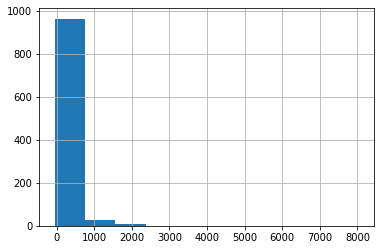

In [9]:
# Using visualization to better understand the data.  This is a historgram displaying vendor payment amount distributions.  
payments["Amount"].hist()

In [10]:
# An option to specifically search for missing data. 
payments.isna().sum()

Payee                    0
Expense_Type             0
Transaction_Date         0
Vendor                  38
City/Travel_Location     0
Amount                   0
Payee_Account            0
Address                  0
City                     0
State                    0
Zip                      0
Label                    0
dtype: int64

In [11]:
# Fill missing vendor names with "missing" & confirm implementation
payments["Vendor"].fillna("missing", inplace=True)
payments.isna().sum()

Payee                   0
Expense_Type            0
Transaction_Date        0
Vendor                  0
City/Travel_Location    0
Amount                  0
Payee_Account           0
Address                 0
City                    0
State                   0
Zip                     0
Label                   0
dtype: int64

## 2.2 Transform Categorical to Numerical

In [12]:
# Use the "get_dummies" method to convert categorical values to numerical and store in a new variable "one_hot_encoded_payments"
num_payments = pd.get_dummies(payments)
num_payments

,Amount,Payee_Account,Zip,Label,"Payee_Ahnjyn, Kara","Payee_Augustine, Maurissa","Payee_Bakersfield, Angelika","Payee_Bannister, Marcus","Payee_Chan, Jimson","Payee_Davidsson, Terra","Payee_Everheart, Carter","Payee_Fitzgerald, Edna","Payee_Gastonbury, Ellington","Payee_Hasseldorf, Douglas","Payee_Homeland, Hector","Payee_Jackson, Ivana","Payee_Kay, Grayson","Payee_Matthew, Myrtle","Payee_Moses, Aiden","Payee_Ostenfeller, Janis","Payee_Primrose, Reah","Payee_Robicheaux, Delaney","Payee_Samson, Shiva","Payee_Tam, Simone","Payee_Ulwyn, Reiner","Payee_Yardbarni, James","Payee_Yesterday, Sylvania",Expense_Type_Airfare,Expense_Type_Ground Transportation,Expense_Type_License Fees/Dues/Subscriptions,Expense_Type_Lodging,Expense_Type_Meals & Entertainment,Expense_Type_Miscellaneous,Expense_Type_Parking,Transaction_Date_1/1/2018,Transaction_Date_1/10/2018,Transaction_Date_1/11/2018,Transaction_Date_1/12/2018,Transaction_Date_1/14/2018,Transaction_Date_1/15/2018,...,City/Travel_Location_Santa Fe,City/Travel_Location_Tampa,City/Travel_Location_Toronto,City/Travel_Location_Washington DC,Address_1005 Lancaster Road,Address_10242 Leameadow,Address_123 Sesame Street,Address_14780 Elkhart Dr,Address_16611 Jennings,Address_17 Massachusettes,Address_1717 Clarenton Dr,Address_18 A Street,Address_1919 Nurse Str,Address_20220 W 7th Street,Address_228 Laurie Lane,Address_3546 W 377,Address_4000 Penderley Way,Address_414 Metairie,Address_4343 Francis Drive,Address_440 M Street,Address_4615 S NW Hwy,Address_5555 Waverton Dr,Address_6680 Twinpost,Address_8850 Beasley,Address_9009 Merrick,City_Benbrook,City_Bethesda,City_Dallas,City_Fort Worth,City_Georgetown,City_Grapevine,City_Haltom City,City_Irving,City_OKC,City_Washington DC,City_Westlake,State_DC,State_MD,State_OK,State_TX
0,5.00,996244841,76101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,70.02,996244841,76101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,250.00,996244841,76101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,48.05,996244841,76101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,33.92,996244841,76101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,471.24,295588121,76110,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1000,194.96,914803767,74119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1001,194.04,914803767,74119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1002,473.00,565604249,74119,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## 2.3 Split Data into Features and Labels

In [13]:
# Store all the features into an X variable, and the labels into the y variable.
X = num_payments.drop("Label", axis=1)
y = num_payments["Label"]

In [14]:
# Display the top 5 rows of features only
X.head()

,Amount,Payee_Account,Zip,"Payee_Ahnjyn, Kara","Payee_Augustine, Maurissa","Payee_Bakersfield, Angelika","Payee_Bannister, Marcus","Payee_Chan, Jimson","Payee_Davidsson, Terra","Payee_Everheart, Carter","Payee_Fitzgerald, Edna","Payee_Gastonbury, Ellington","Payee_Hasseldorf, Douglas","Payee_Homeland, Hector","Payee_Jackson, Ivana","Payee_Kay, Grayson","Payee_Matthew, Myrtle","Payee_Moses, Aiden","Payee_Ostenfeller, Janis","Payee_Primrose, Reah","Payee_Robicheaux, Delaney","Payee_Samson, Shiva","Payee_Tam, Simone","Payee_Ulwyn, Reiner","Payee_Yardbarni, James","Payee_Yesterday, Sylvania",Expense_Type_Airfare,Expense_Type_Ground Transportation,Expense_Type_License Fees/Dues/Subscriptions,Expense_Type_Lodging,Expense_Type_Meals & Entertainment,Expense_Type_Miscellaneous,Expense_Type_Parking,Transaction_Date_1/1/2018,Transaction_Date_1/10/2018,Transaction_Date_1/11/2018,Transaction_Date_1/12/2018,Transaction_Date_1/14/2018,Transaction_Date_1/15/2018,Transaction_Date_1/16/2018,...,City/Travel_Location_Santa Fe,City/Travel_Location_Tampa,City/Travel_Location_Toronto,City/Travel_Location_Washington DC,Address_1005 Lancaster Road,Address_10242 Leameadow,Address_123 Sesame Street,Address_14780 Elkhart Dr,Address_16611 Jennings,Address_17 Massachusettes,Address_1717 Clarenton Dr,Address_18 A Street,Address_1919 Nurse Str,Address_20220 W 7th Street,Address_228 Laurie Lane,Address_3546 W 377,Address_4000 Penderley Way,Address_414 Metairie,Address_4343 Francis Drive,Address_440 M Street,Address_4615 S NW Hwy,Address_5555 Waverton Dr,Address_6680 Twinpost,Address_8850 Beasley,Address_9009 Merrick,City_Benbrook,City_Bethesda,City_Dallas,City_Fort Worth,City_Georgetown,City_Grapevine,City_Haltom City,City_Irving,City_OKC,City_Washington DC,City_Westlake,State_DC,State_MD,State_OK,State_TX
0,5.00,996244841,76101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,70.02,996244841,76101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,250.00,996244841,76101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,48.05,996244841,76101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,33.92,996244841,76101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [15]:
# Display the top 5 rows of labels only
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

## 2.4 Split Data into Training and Test Sets
This step involves further splitting our data into training and testing portions. The "train_test_split" method is found in the Scikit Learn library. By convention the portion of the testing data would be anywhere between 20% and 25% of the dataset. It's 20% (test_size=.2) below.

In [16]:
''' Split the features into "X_train" & "X_test".  Split the labels into "y_train" & "y_test" 
The "train_test_split" method does all the work behind the scenes.  The test size is 20% of the dataset'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [17]:
# Confirm the # of rows and columns to validate the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((803, 479), (201, 479), (803,), (201,))

#3. Algorithm/Model Selection & Fit
## 3.1 Review Algorithm Options
You may use the Scikit Learn algorithm cheatsheet to help identify algorithm options given the data size, existence of labels, and whether you're predicting a category (e.g., fraud or no fraud) or a continuous value (e.g., price of homes)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

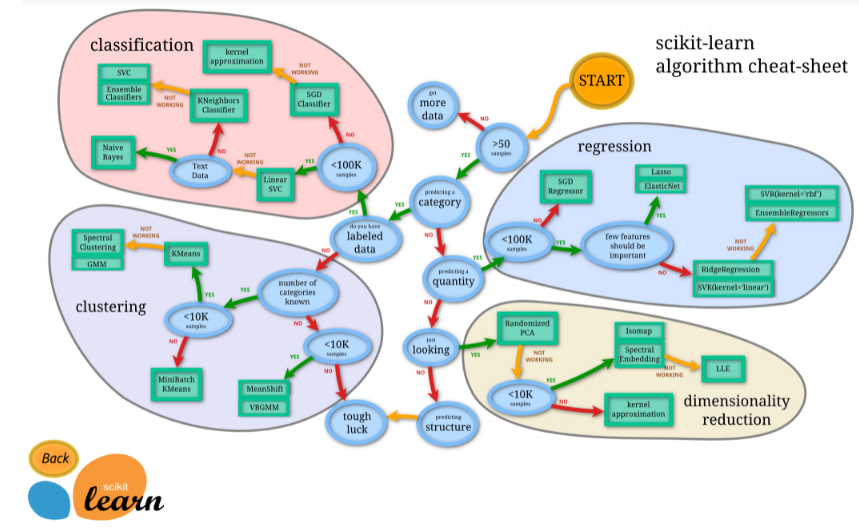

## 3.2 Try Random Forest Classifer, Fit and Make Baseline Prediction
This step involves importing the RandomForestClassifier algorithm from the Scikit Learn library. We need to make a copy of it, store in a variable (called clf here, but can be called anything), fit (train) the algorithm, and perform a quick baseline accuracy test using the score method.

In [18]:
# We copy code from the Scikit Learn library (RandomForestClassifier). Make copy of the algo and store it in a variable 
model = RandomForestClassifier()

# Train (fit) the algorithm by calling the "fit" method against our new variable.  Once trained, it becomes a model.  
model.fit(X_train, y_train)

# Make baseline prediction using predict method
pred = model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

# 4. Evaluate the ML Model
Options for Evaluating ML Models

* Estimator score method
* The scoring parameter
* Problem-specific metric functions

Documentation from Scikit Learn: https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 Score Method
A quick way to measure the accuracy of your classification model. italicized text 

In [19]:
#  The score method measures accuracy with classification problems
model.score(X_test, y_test)

0.9651741293532339

## 4.2 Scoring Method
This step involves a second evalution metric that leverages a cross validation techinque involving splitting our data into cross sections with a default of 5 scores

In [20]:
# We import code from the Scikit Learn library by importing the cross_val_content to continue our evaluation 
from sklearn.model_selection import cross_val_score

# To evaluate using whats called "cross validation".  We get 5 scores which we can then average
cross_val_score(model, X, y, scoring=None)

array([0.95522388, 0.95522388, 0.96517413, 0.54726368, 0.96      ])

In [21]:
# Find the mean of the cross validation scores
np.mean(cross_val_score(model, X, y))

0.874587064676617

## 4.3 Other Metrics
This step involves the use of the Classification Report, which helps measure the quality of predictions from a classification model (i.e, how many predictions are true vs false). 
* **Recall**:  Percentage of positive cases caught. 
* **Precision**:  Percentage of predictions that were correct. 
* **F1-Score**:  Percentage of positive predictions that were correct. 
* **Support**:  The number of occurences of each given class in your data set.

In [22]:
# Use the classification report for summary results of various key metrics 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       193
           1       0.67      0.25      0.36         8

    accuracy                           0.97       201
   macro avg       0.82      0.62      0.67       201
weighted avg       0.96      0.97      0.96       201



# 5. Improve the ML Model
If we determined a score higher than 89% was necessary to proceed with making predictions in the real world, we could consider various options for changes to achieve a higher level of predictive efficacy.

1. **Data**: Collect more data (i.e., more rows) or improve our dataset with more features.
2. **Model**: Consider tesing other algorithms.
3. **Hyperparameters (model settings)**: Test with changes to hyperparameters, which are model settings that are configurable beyond default values.

In [23]:
# How to identify the hyperparameters with code
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Note:** These represent baseline predictions. Further testing with other metrics would be necessary for thoroughness. Once a model is ready for use, testing it against data it hasn't seen before (beyond the included testing data) would help assess whether the model can generalize well, i.e., handle new data well.

# 6. Save & Re-use the Model
To re-use your trained model without replicating the previous steps, there are various options.  A quick and simple approach involes using the Pickle module.  Once the model of choice is saved into a separate file, it can be loaded and called upon as needed

In [24]:
# Import the pickle module
import pickle

In [25]:
#Save existing model to file
pickle.dump(model, open("prod_model.pkl", "wb"))

In [26]:
# Load a saved model
loaded_model = pickle.load(open("prod_model.pkl", "rb"))

In [27]:
# Make some predictions
loaded_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

# Credits
A special thanks to Daniel Bourke for his course Complete Machine Learning & Data Science Bootcamp 2021 offered via Udemy.  The course's content was the inspiration for this notebook in terms of style, code, and structure of communicating the content.

* https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery.

Also thanks to Langlinais Fraud & Audit Advisory, LLC for the anonymized dataset supporting this anaysis. For any fraud analytics training, fraud investigation, or other needs, please go to:
* https://scottlanglinais.com/ 